In [1]:
import sys
sys.path.insert(0, '../scripts')

import direction_transition as dit
from preprocessing import get_all_sheet_names, read_excel_by_sheet
ctrl_path = '../reversal_ctrl.xlsx'
cask_path = '../reversal_cask.xlsx'
ctrl_sheets = get_all_sheet_names(ctrl_path)
cask_sheets = get_all_sheet_names(cask_path)
from intervals import mean_pellet_collect_time, plot_retrieval_time_by_block, perform_T_test

action_prop = 0.75
block_prop = 0.6
meal_config=[60, 2]
result_prop = 0.25

In [2]:
ctrl_learning_result = []
ctrl_scores = []

for sheet in ctrl_sheets:
    data = read_excel_by_sheet(sheet, ctrl_path, cumulative_accuracy=False)  
    blocks = dit.split_data_to_blocks(data)
    # data_stats = dit.get_transition_info(blocks, meal_config=meal_config, reverse=False)
    ctrl_learning_result.append(dit.learning_result(blocks, action_prop=action_prop))
    ctrl_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

In [3]:
cask_scores = []
cask_learning_result = []

for sheet in cask_sheets:
    data = read_excel_by_sheet(sheet, cask_path, cumulative_accuracy=False)  
    blocks = dit.split_data_to_blocks(data)
    # data_stats = dit.get_transition_info(blocks, meal_config=meal_config, reverse=False)
    cask_learning_result.append(dit.learning_result(blocks, action_prop=action_prop))
    cask_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

In [4]:
perform_T_test(ctrl_scores, cask_scores, test_side='greater')

P Value is  0.029732063747835446
Experiment group is significantly greater than control group


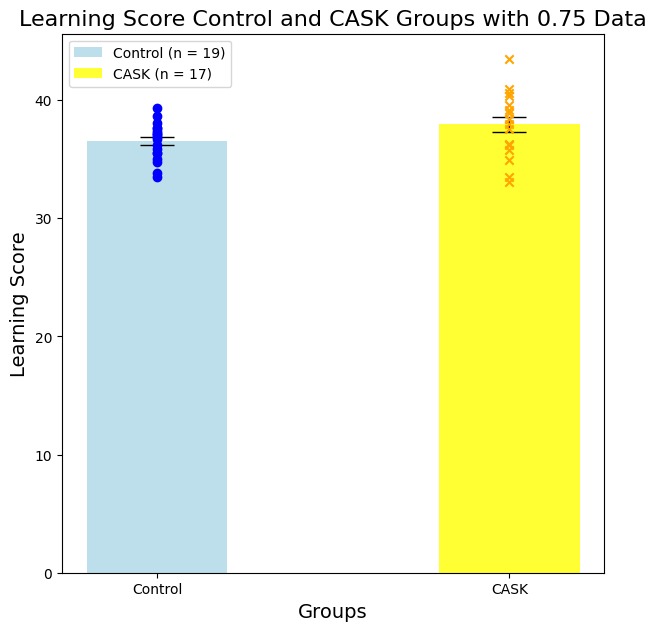

In [5]:
dit.graph_learning_score(ctrl_scores, cask_scores, exp_group_name='CASK', proportion=action_prop)

In [6]:
perform_T_test(ctrl_learning_result, cask_learning_result, test_side='greater')

P Value is  9.39891836745011e-05
Experiment group is significantly greater than control group


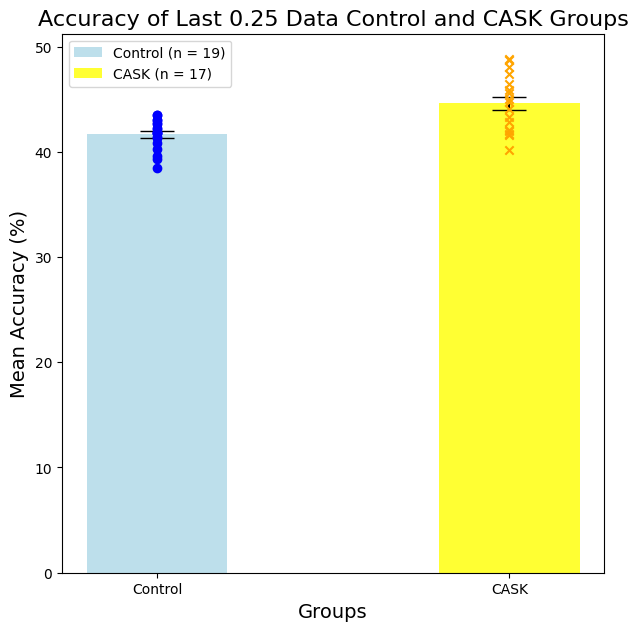

In [7]:
dit.graph_learning_results(ctrl_learning_result, cask_learning_result, proportion=0.25, exp_group_name='CASK')

### Pellet Collect Time

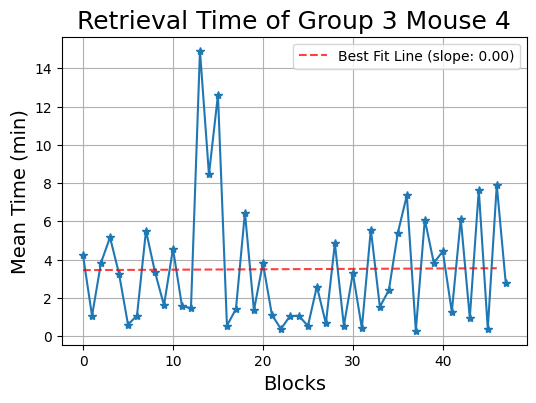

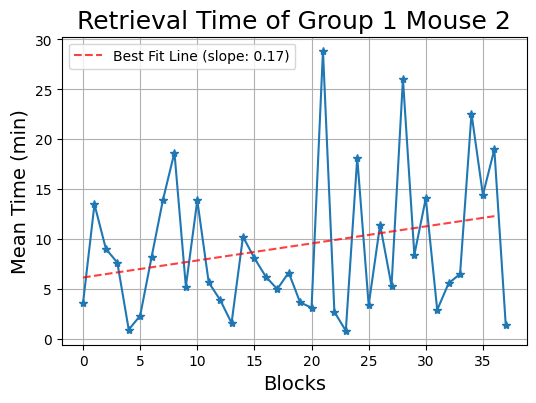

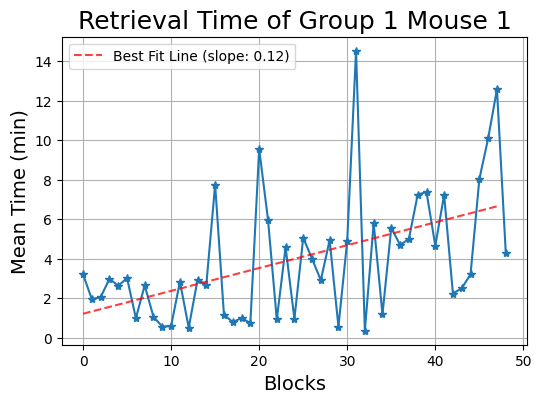

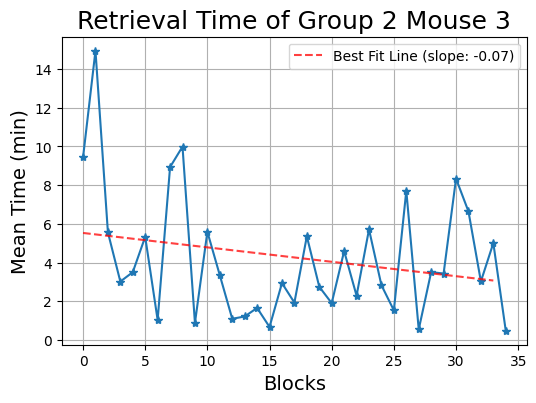

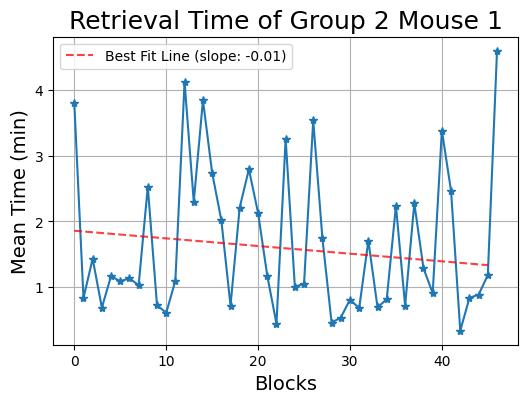

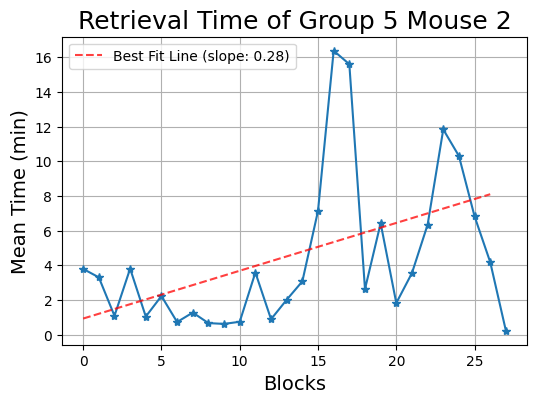

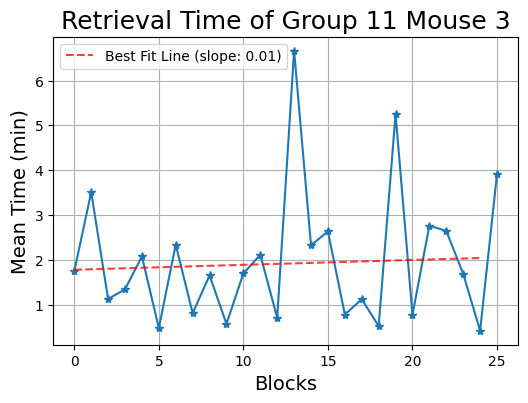

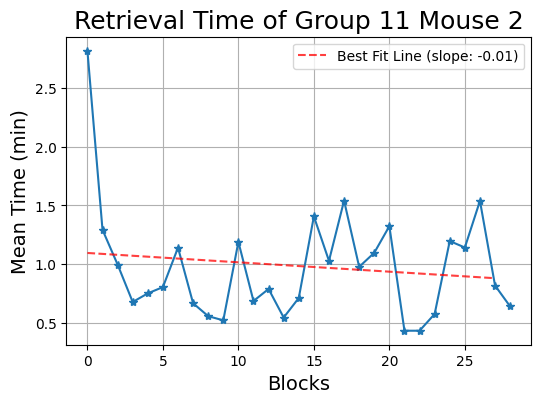

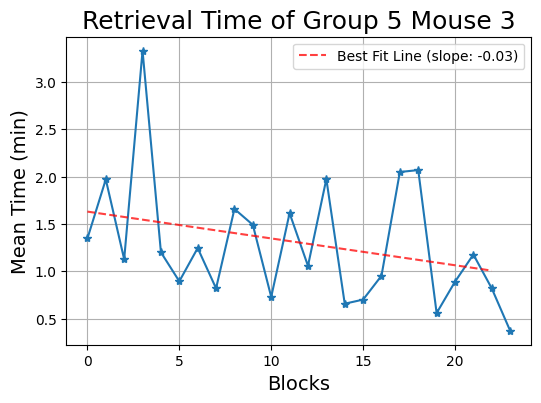

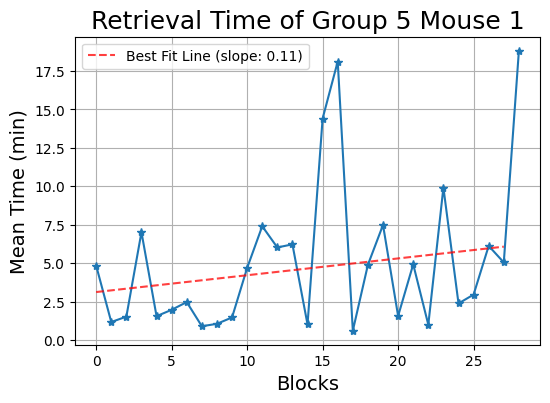

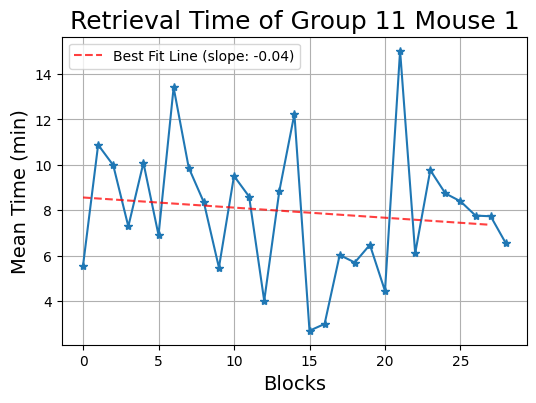

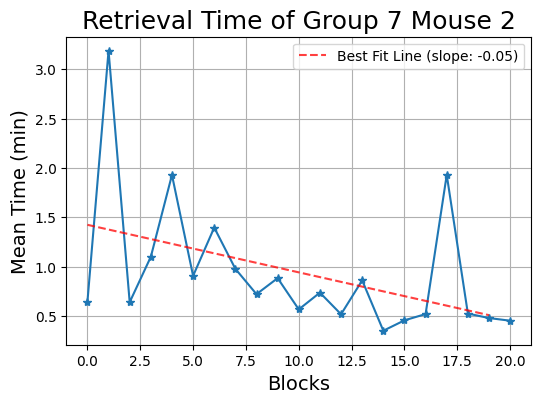

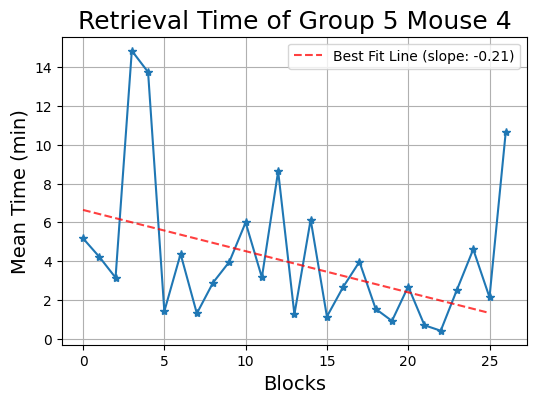

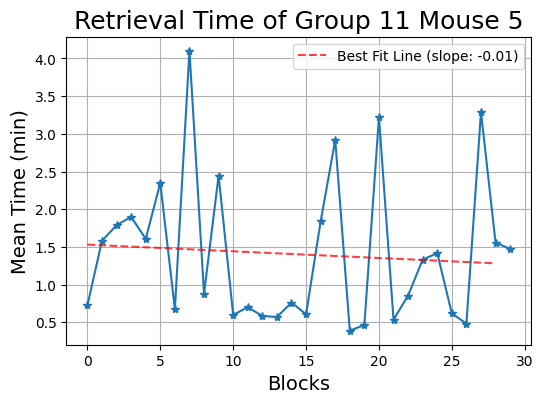

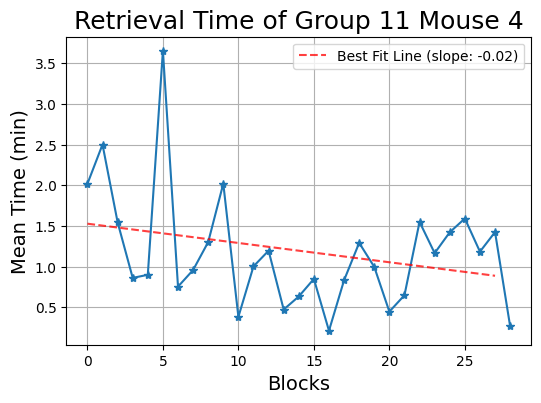

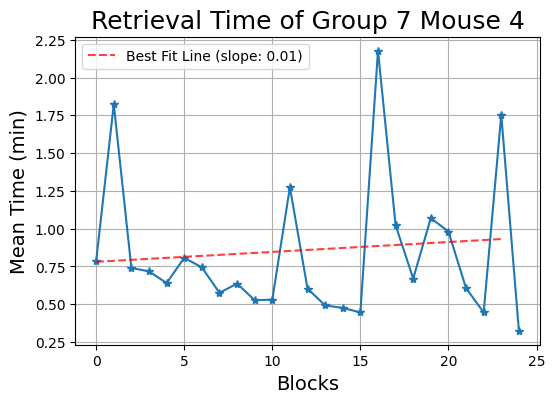

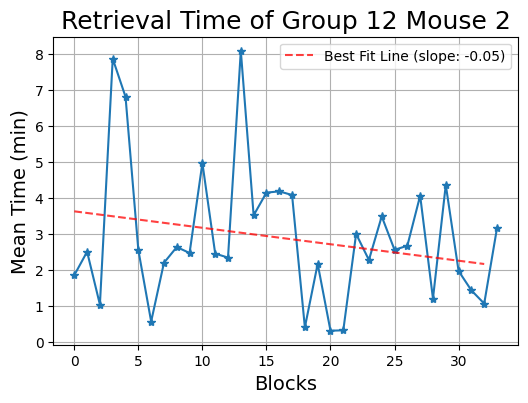

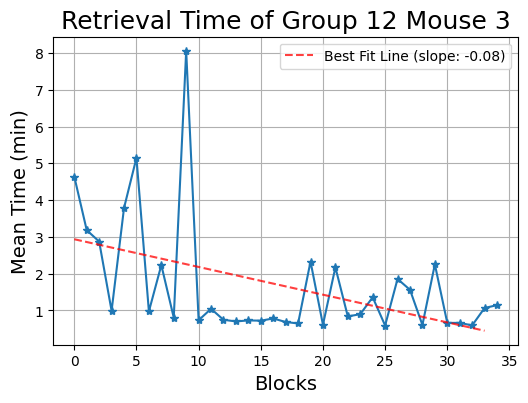

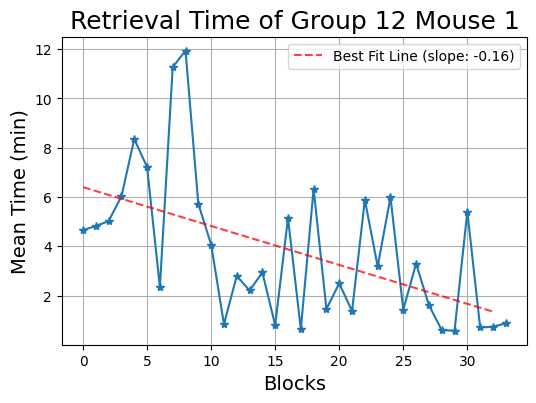

In [12]:
ctrl_all_times = []
ctrl_median = []
ctrl_stds = []
ctrl_pred = []
ctrl_slope = []

for sheet in ctrl_sheets[:]:
    times, mean, std = mean_pellet_collect_time(ctrl_path, sheet, remove_outlier=True, n_stds=2)
    _, pred, slope = plot_retrieval_time_by_block(ctrl_path, sheet)
    ctrl_all_times.append(times)
    ctrl_median.append(mean)
    ctrl_stds.append(std)
    ctrl_pred.append(pred)
    ctrl_slope.append(slope)

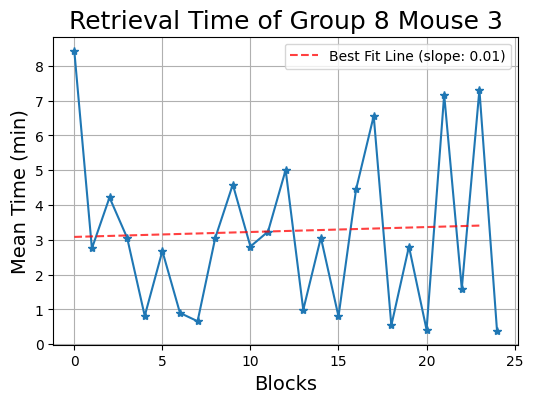

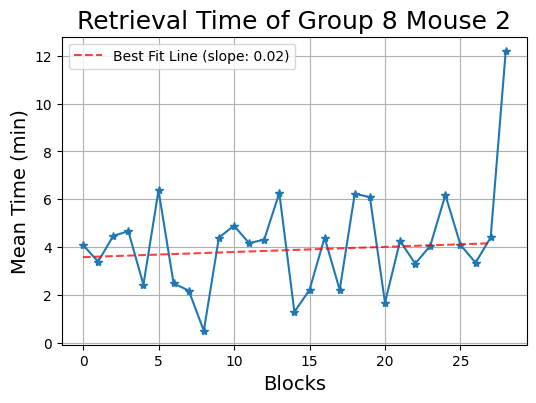

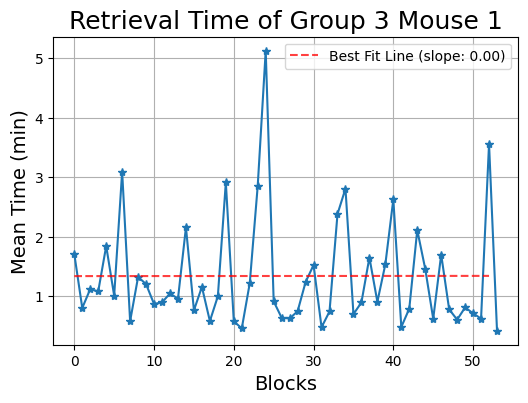

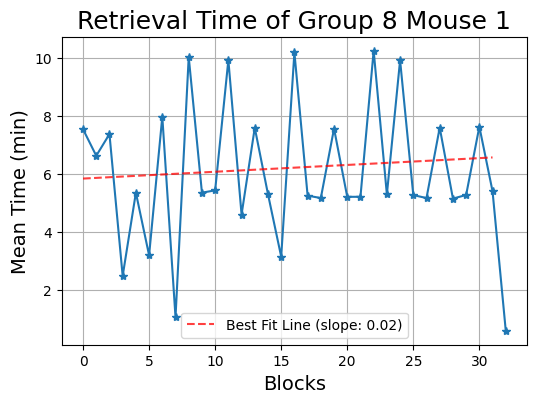

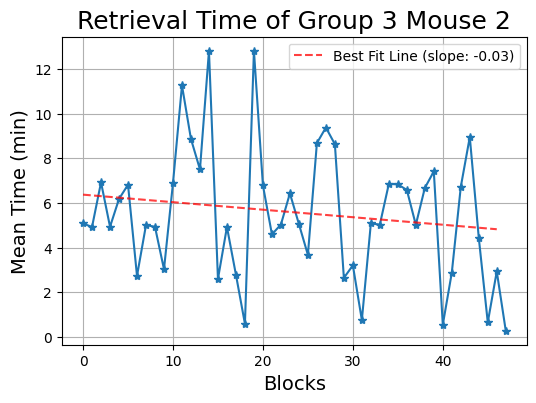

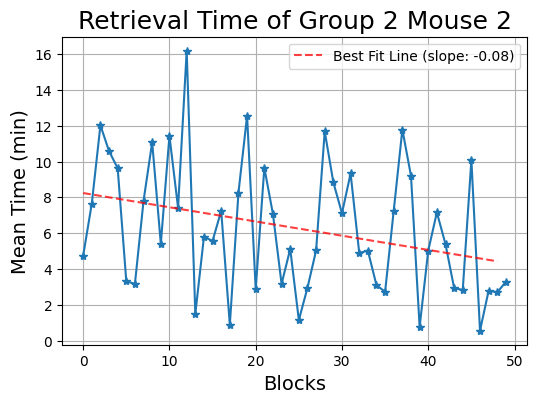

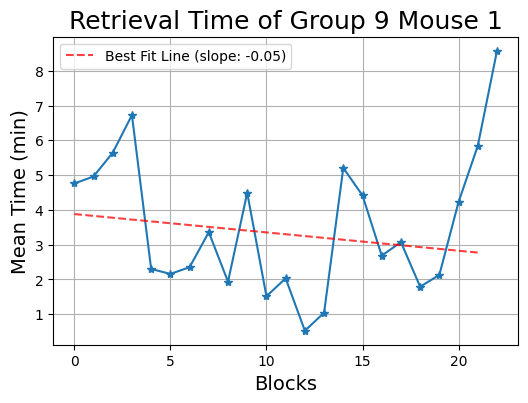

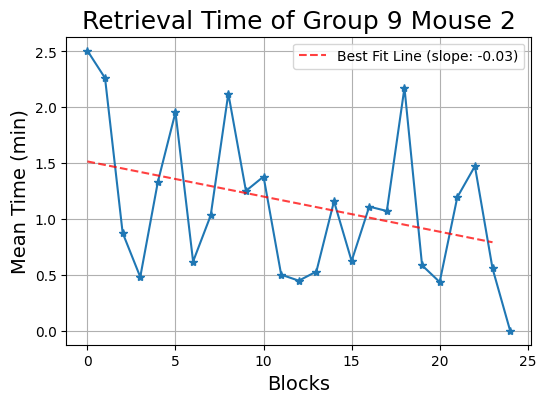

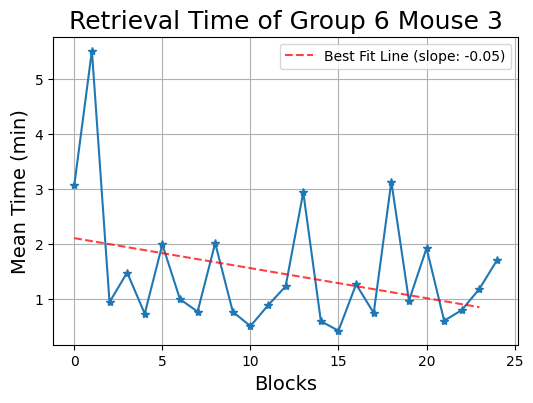

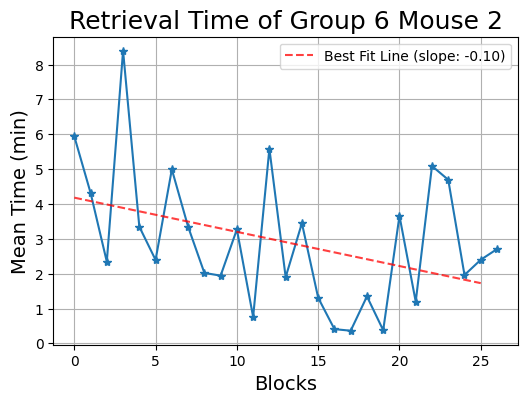

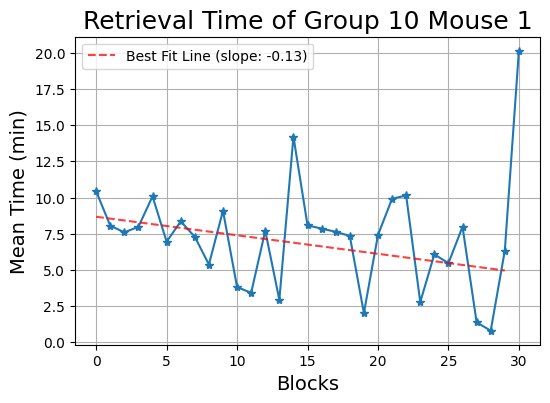

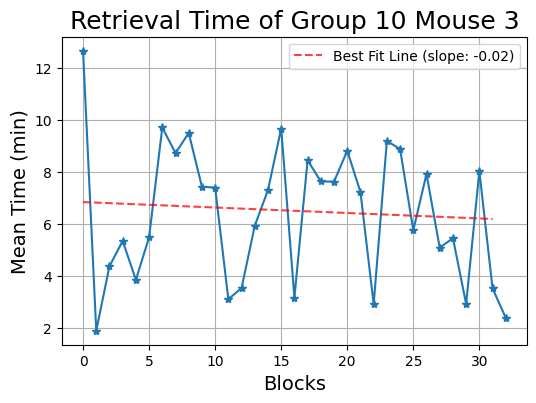

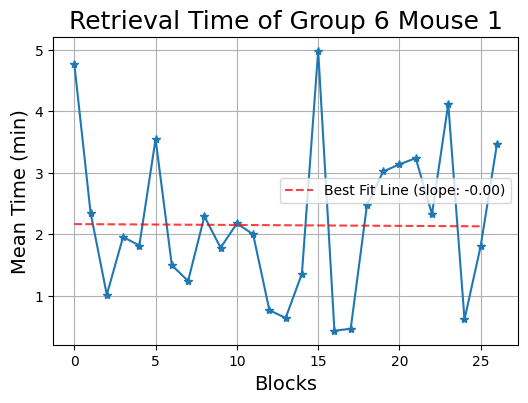

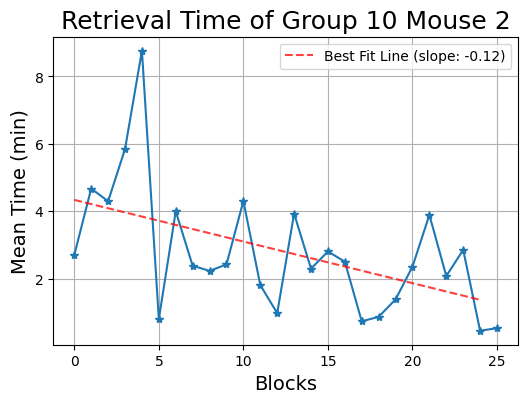

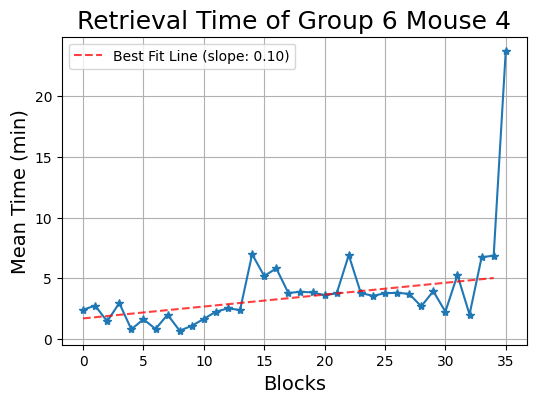

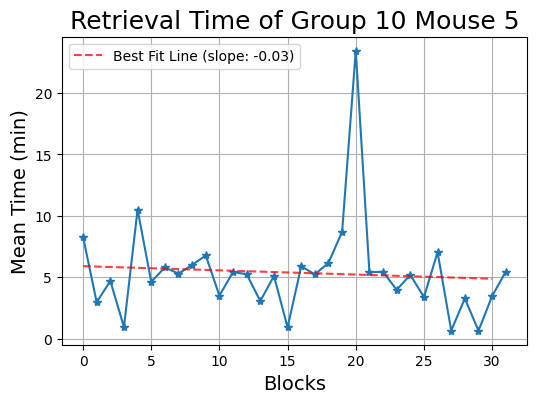

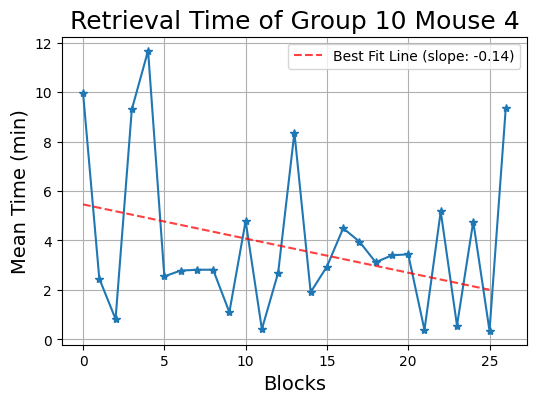

In [13]:
cask_all_times = []
cask_median = []
cask_stds = []
cask_pred = []
cask_slope= []

for sheet in cask_sheets[:]:
    times, mean, std = mean_pellet_collect_time(cask_path, sheet, remove_outlier=True, n_stds=2)
    _, pred, slope = plot_retrieval_time_by_block(cask_path, sheet)
    cask_all_times.append(times)
    cask_median.append(mean)
    cask_stds.append(std)
    cask_pred.append(pred)
    cask_slope.append(slope)

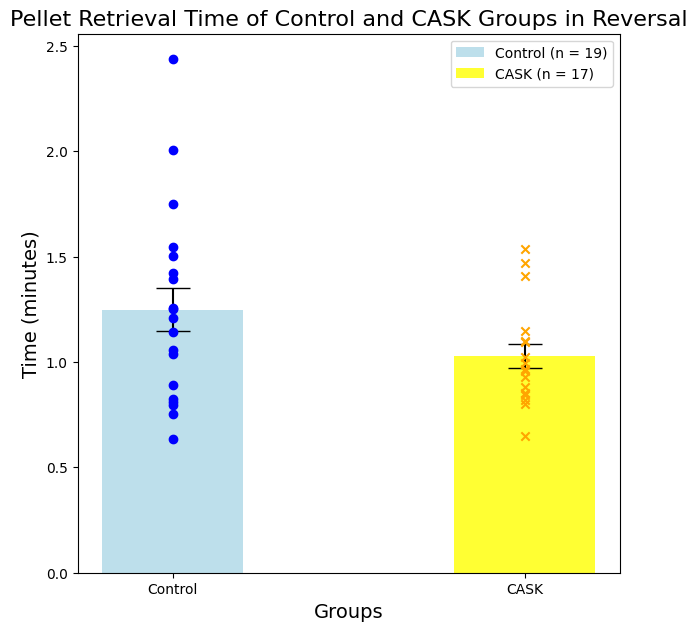

In [14]:
dit.graph_retrieval_time(ctrl_median, cask_median, exp_group_name='CASK', rev=True)

In [15]:
import intervals as invs

invs.perform_T_test(ctrl_median, cask_median, test_side='less')

P Value is  0.04413923010704071
Experiment group is significantly less than control group


In [16]:
invs.perform_T_test(ctrl_stds, cask_stds, test_side='less')

P Value is  0.08205414847078842
There is no significant difference between the two groups.


In [17]:
invs.perform_T_test(ctrl_slope, cask_slope, test_side='less')

P Value is  0.13083531397916756
There is no significant difference between the two groups.


In [18]:
invs.perform_T_test(ctrl_pred, cask_pred, test_side='less')

P Value is  0.5498950210434244
There is no significant difference between the two groups.


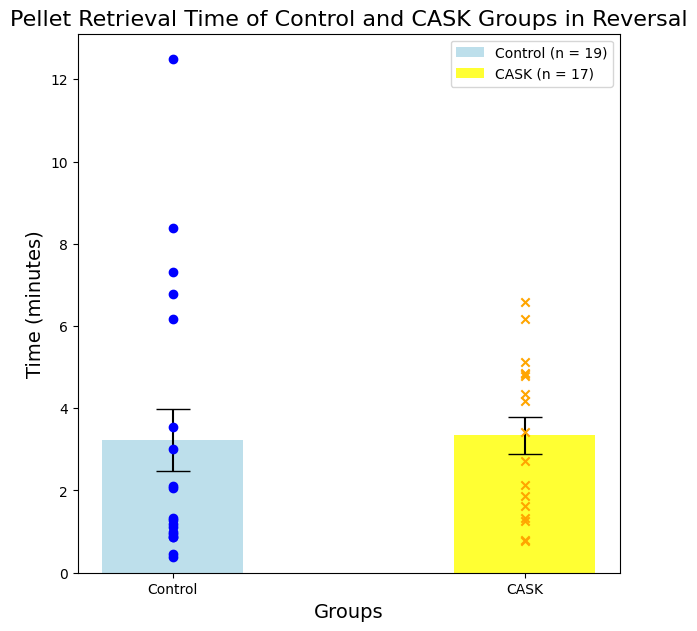

In [19]:
dit.graph_retrieval_time(ctrl_pred, cask_pred, exp_group_name='CASK', rev=True)

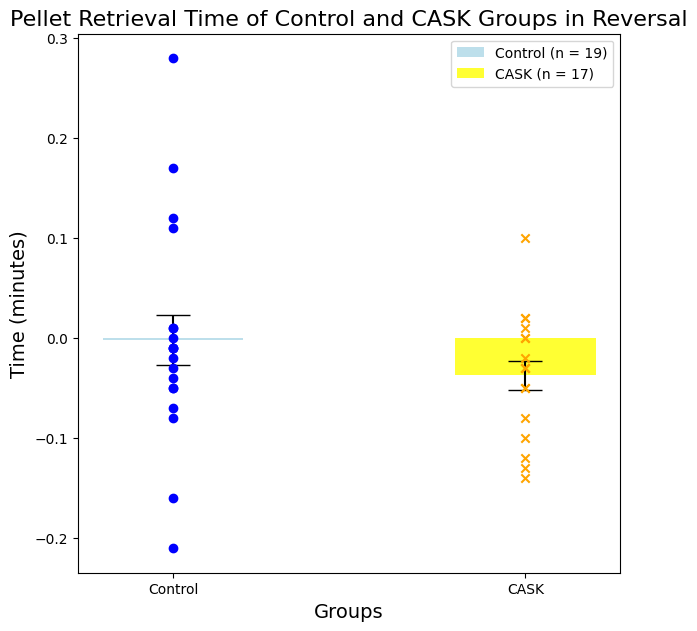

In [20]:
dit.graph_retrieval_time(ctrl_slope, cask_slope, exp_group_name='CASK', rev=True)

In [23]:
ctrl_all_times = []
ctrl_means = []
ctrl_stds = []

for sheet in ctrl_sheets:
    times, mean, std = mean_pellet_collect_time(ctrl_path, sheet, remove_outlier=True, n_stds=2)
    ctrl_all_times.append(times)
    ctrl_means.append(mean)
    ctrl_stds.append(std)

In [21]:
cask_all_times = []
cask_means = []
cask_stds = []

for sheet in cask_sheets:
    times, mean, std = mean_pellet_collect_time(cask_path, sheet, remove_outlier=True, n_stds=2)
    cask_all_times.append(times)
    cask_means.append(mean)
    cask_stds.append(std)

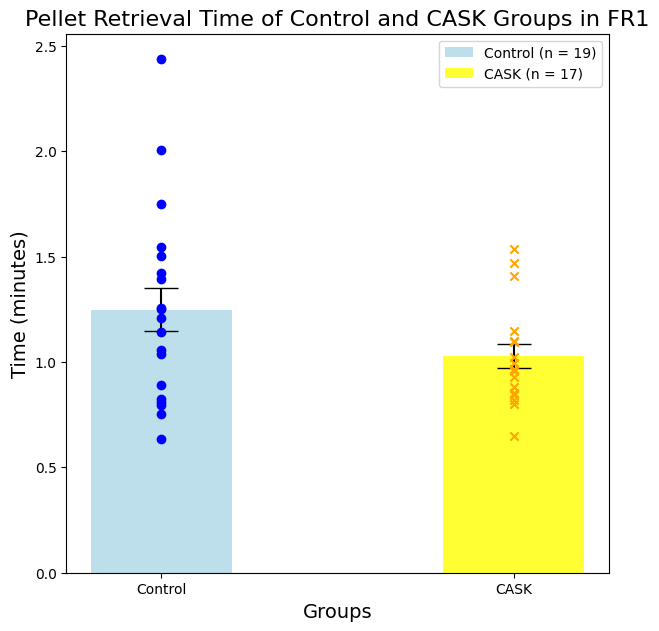

In [24]:
dit.graph_retrieval_time(ctrl_means, cask_means, exp_group_name='CASK', rev=False)

In [25]:
import intervals as invs

invs.perform_T_test(ctrl_means, cask_means, test_side='less')

P Value is  0.04413923010704071
Experiment group is significantly less than control group


In [26]:
invs.perform_T_test(ctrl_stds, cask_stds, test_side='less')

P Value is  0.08205414847078842
There is no significant difference between the two groups.
